In [1]:
#Librerías a utilizar
from astropy.io import fits #librería para leer archivos ".fits"
import numpy as np #Para tratar los pixeles como arreglos
import matplotlib.pyplot as plt #Para graficar los histogramas y demás
import pandas as pd #Para leer datos en forma de tabla
import os #librería para recorrer el directorio
from matplotlib.colors import LogNorm #librería para el plt.imshow() (escala log, pero no se ocupa... (podría ser útil))

plt.style.use('bmh') #estilo de las gráficas

In [2]:
#Parte del Master Bias!!

In [3]:
bias_images_names = 'CA__f_i_t_eBias0000014{numb}.fit' #creamos la variable correspondiente a los nombres de los archvios bias

In [4]:
for i in range(0, 10): #ciclo for para recorrer los archivos de inteŕes para el bias
    bias_images = fits.open(bias_images_names.format(numb=i)) #para colocar el nombre respectivos
    hdr_bias = bias_images[0].header #Para leer el header
    print('ImageName: CA__f_i_t_eBias0000014' + str(i) + '.fit / TypeImage: ' + hdr_bias['IMAGETYP']) #utilizamos esto para ver el tipo de imagen al que corresponde cada una

ImageName: CA__f_i_t_eBias00000140.fit / TypeImage: Bias Frame
ImageName: CA__f_i_t_eBias00000141.fit / TypeImage: Bias Frame
ImageName: CA__f_i_t_eBias00000142.fit / TypeImage: Bias Frame
ImageName: CA__f_i_t_eBias00000143.fit / TypeImage: Bias Frame
ImageName: CA__f_i_t_eBias00000144.fit / TypeImage: Bias Frame
ImageName: CA__f_i_t_eBias00000145.fit / TypeImage: Bias Frame
ImageName: CA__f_i_t_eBias00000146.fit / TypeImage: Bias Frame
ImageName: CA__f_i_t_eBias00000147.fit / TypeImage: Bias Frame
ImageName: CA__f_i_t_eBias00000148.fit / TypeImage: Bias Frame
ImageName: CA__f_i_t_eBias00000149.fit / TypeImage: Bias Frame


Aquí podemos ver cada imagen del bias y comprobamos su tipo directamente desde el header. Podemos ver que hay 10 imágenes de bias

In [5]:
Bias = np.array([fits.getdata("CA__f_i_t_eBias0000014%d.fit" % n) for n in range(0,10)]) #Aquí juntamos las imágnes de bias
print(np.shape(Bias)) #Esto es para ver las dimensiones del arreglo creado
master_bias = np.mean(Bias,axis=0) #Creamos Master Bias promediando 
#fits.writeto('master_dark.fits', master_bias) #Para guardar la imagen master_bias como archivo .fits

(10, 4096, 4096)


Lo que queremos hacer ahora es crear un histograma con los valores de los pixeles (con la desviación estandar y promedio de esta muestra), por lo que realizamos lo siguiente:

In [6]:
bias_1d = master_bias.flatten() #Ponemos los valores de los pixeles en un sólo array (1 Dimensión)
mean = np.mean(bias_1d) #valor promedio (también podemos decir que es el color de fondo de la imagen)
s_desv = np.std(bias_1d) #la desviación de los valores de los pixeles (puede interpretarse como los valores de las líneas que se ven en la imagen de más abajo)
err_bias_menor = mean - s_desv #valores de la desviación estandar con respecto el promedio
err_bias_mayor = mean + s_desv #valores de la desviación estandar con respecto el promedio

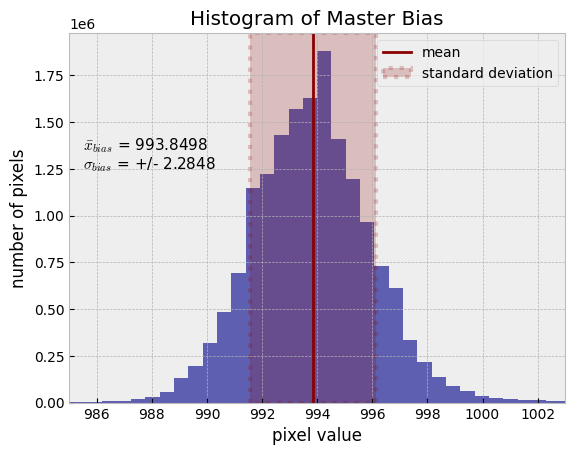

In [7]:
plt.hist(bias_1d, color = 'darkblue', bins = 100, alpha = 0.6, range = (968, 1020)) #Gráfica del histograma de los valores de los pixeles (elegí ese rango porque es el sector donde están los valores de la imágen master_bias) 
plt.axvline(mean, color = 'darkred', label = 'mean')
plt.axvspan(err_bias_menor, err_bias_mayor, color = 'darkred', alpha=0.2, lw=3, ls = ':', label = 'standard deviation')
plt.xlim(985, 1003) #Puse este límite para una visualización con zoom
plt.title('Histogram of Master Bias')
plt.text(985.5, 1.35*1e6, r'$\bar{x}_{bias}$ = ' + str(round(mean, 4)), fontsize=11)
plt.text(985.5, 1.25*10**6, r'$\sigma_{bias}$ = +/- ' + str(round(s_desv, 4)), fontsize=11)
plt.xlabel('pixel value')
plt.ylabel('number of pixels')
plt.legend()
plt.show()

Ahora para poder visualizar mejor esto, podemos observar la imagen que estamos creando (master bias) con el siguiente código: (cabe mencionar que en la linea del plt.imshow(), tenemos la opción de vmin y vmax, los cuales corresponden al valor mínimo y máximo que le daremos a la color-bar, para que así podamos ver bien la imagen (por las escalas; es como mover el click hacia la derecha e izquierda en ds9))

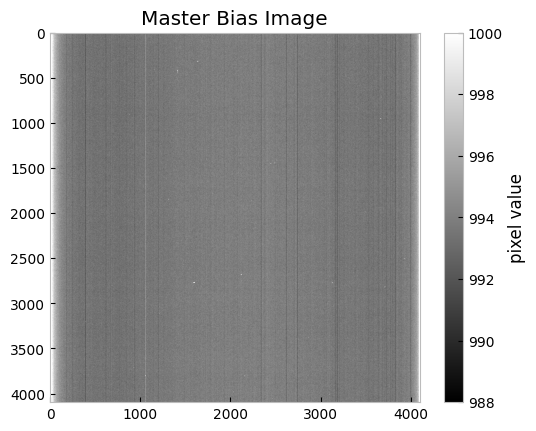

In [8]:
#Imagen del master bias, en donde las lineas son el ruido, en mayor parte, por la conversión análogo a digital y por temperatura de la CCD, electrones libres, etc... (tras sacar la imagen con el lente tapado y con tiempo de exposición muy corto)
plt.imshow(master_bias, cmap='gray', vmin=988, vmax=1000)
plt.colorbar(label = 'pixel value')
plt.title('Master Bias Image')
plt.grid(False)
plt.show()

In [9]:
#Parte del Master Dark!!

In [10]:
dark_images_names = '_t_q_i_m_fDark{numb1}.00mins0000016{numb2}.fit' #creamos la variable correspondiente a los nombres de los archvios Dark

In [11]:
z = 3
for i in range(3, 6): #ciclo for para recorrer las imágenes que utilizaremos
    dark_images = fits.open(dark_images_names.format(numb1=i, numb2=z)) #para colocar el nombre respectivos
    hdr_dark = dark_images[0].header #Para leer el header
    print('ImageName: _t_q_i_m_fDark' + str(i) + '.00mins0000016' + str(z) + '.fit / TypeImage: ' + hdr_dark['IMAGETYP']
            + ' / Exp. time: ' + str(hdr_dark['EXPTIME']) + ' (seconds)') #utilizamos esto para ver el tipo de imagen al que corresponde cada una
    z -=1

ImageName: _t_q_i_m_fDark3.00mins00000163.fit / TypeImage: Dark Frame / Exp. time: 180.0 (seconds)
ImageName: _t_q_i_m_fDark4.00mins00000162.fit / TypeImage: Dark Frame / Exp. time: 240.0 (seconds)
ImageName: _t_q_i_m_fDark5.00mins00000161.fit / TypeImage: Dark Frame / Exp. time: 300.0 (seconds)


Aquí vemos en orden; el nombre de archivo, su respectivo tipo y su tiempo de exposición en segundos. Fueron tomadas 3 imágenes Dark con tiempo de exposición respectivo de: 180, 240 y 300 segundos.

In [12]:
dark_names = ['_t_q_i_m_fDark3.00mins00000163.fit', '_t_q_i_m_fDark4.00mins00000162.fit', '_t_q_i_m_fDark5.00mins00000161.fit'] #creamos una lista de los nombres de imagenes dark
dark = np.array([fits.getdata(str(i)) for i in dark_names]) #para tener los datos de todas las imágenes que tenemos en forma de matriz 3D
print(np.shape(dark)) #para observar el tamaño del arreglo que tenemos

(3, 4096, 4096)


Utilizamos el gráfico mostrado a continuación para observar que es posible obtener valores negativos de la resta entre "dark_i - Master_Bias", para el cálculo del Master Dark, esto indicaría que las imágenes dark tienen más ruido al tener mayor tiempo de exposición (tiene valores de pixeles más bajos y más altos que master bias, enotnces resta queda negativa)

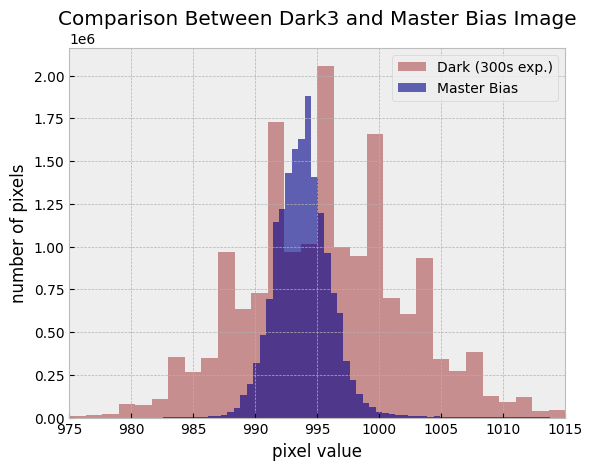

In [13]:
plt.hist(dark[2,:,:].flatten(), bins = 30, range = (975,1015), alpha = 0.4, color = 'darkred', label = 'Dark (300s exp.)')
plt.hist(bias_1d, color = 'darkblue', bins = 100, alpha = 0.6, range = (968, 1020), label = 'Master Bias') 
plt.xlim(975, 1015)
plt.title('Comparison Between Dark3 and Master Bias Image') #Dark3 tiene timpo de exposición de 300 segundos!!
plt.xlabel('pixel value')
plt.ylabel('number of pixels')
plt.legend()
plt.show()

Para hacer bien la combinación de las imágenes dark tenemos que tener en consideración el tiempo de exposición de cada una, para esto realizamos lo siguiente:

In [14]:
norm_dark = [] #Lista para agregar los calculos que hagamos "(dark_i - master_bias)/tiempo_exp." agregaremos matrices y las enlistaremos
cont = 0
z = 3
for i in range(3, 6):
    dark_images = fits.open(dark_images_names.format(numb1=i, numb2=z)) #para colocar el nombre respectivos
    hdr_dark = dark_images[0].header #Para leer el header
    time_exp = hdr_dark['EXPTIME'] #Para obtener el tiempo de exposición de cada imagen
    resta = dark[cont,:,:] - master_bias #la resta entre iamgen dark (de distintos tiempos de exposición con el master bias)
    mast_dark = resta/time_exp #dividir por el tiempo de exposición  de cada imagen dark (estamos normalizando la imagen por el tiempo que demoró en tomar loa imagen)
    norm_dark.append(mast_dark) #agregamos a la lista las imagenes como arreglos 2D
    z -=1
    cont += 1

master_dark_3d = np.asarray(norm_dark) #creo un arreglo como una matriz 3d, en donde son 3 imágenes (2D), con pixeles en ejes x y eje y. 
master_dark = np.mean(master_dark_3d, axis = 0) #combino las imagenes con el promedio por píxel (por eso axis = 0)
#fits.writeto('master_dark.fits', master_dark) #guardo la imagen en formato .fits

Ahora queremos observar la distribución de los valores de los pixeles, sin embargo, me di cuenta que hay valores muy áltos debidos probablemente por error instrumental, por lo que los queremos eliminar de la muestra, ya que influye en la desviación estandar que no es representativa para los datos.

In [15]:
dark_1d = master_dark.flatten() #Colocamos los valores de pixeles en un solo array (1 D) 
err = np.where(dark_1d < 1)[0] #array con las posiciones en donde el valor de dark_1d es menor a 1 (me di cuenta qque si es mayor a 1,debe ser un error instrumental)
dark_1d_sin_err = dark_1d[err] #aplicamos las posiciones al dark_1d para utilizar un array corregido en el rango de interés
mean_dark = np.mean(dark_1d_sin_err) #promedio de los valores por pixeles (sería como el color de fondo de la imagen que reproduciré más adelante)
s_desv_dark = np.std(dark_1d_sin_err) #desviación estandar de los datos que estamos considerando
err_dark_menor = mean_dark - s_desv_dark
err_dark_mayor = mean_dark + s_desv_dark

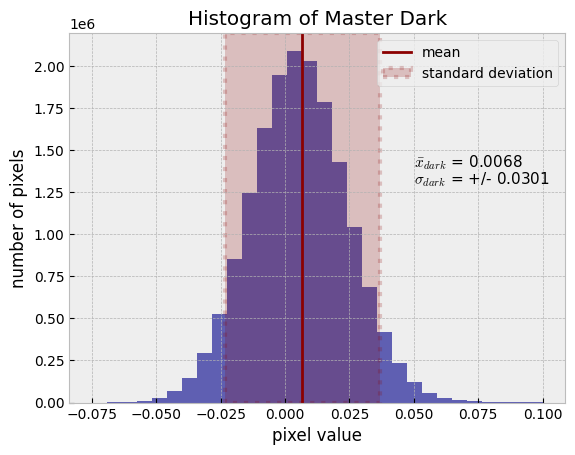

In [16]:
plt.hist(dark_1d_sin_err, bins = 30, range = (-0.075, 0.1), color = 'darkblue', alpha = 0.6) #histograma para ver la distribución de los valores de pixeles
plt.axvline(mean_dark, color = 'darkred', label = 'mean') #para mostrar linea roja con el promedio de los datos
plt.axvspan(err_dark_menor, err_dark_mayor, color = 'darkred', alpha=0.2, lw=3, ls = ':', label = 'standard deviation') #región en donde tenemos la desviación estandar en los extremos (c/r al mean)
plt.title('Histogram of Master Dark') #titulo de la imagen
plt.text(0.05, 1.4*1e6, r'$\bar{x}_{dark}$ = ' + str(round(mean_dark, 4)), fontsize=11) #texto con el valor del promedio
plt.text(0.05, 1.3*10**6, r'$\sigma_{dark}$ = +/- ' + str(round(s_desv_dark, 4)), fontsize=11) #texto ocn el valor de la desviación estandar
plt.xlabel('pixel value') #nombre del eje x
plt.ylabel('number of pixels') #nombre del eje y
plt.legend() #para mostrar la leyenda 
plt.show() #para mostrar el plot

Es importante comprender que la dark image viene dada por rel ruido térmico (principalmente)

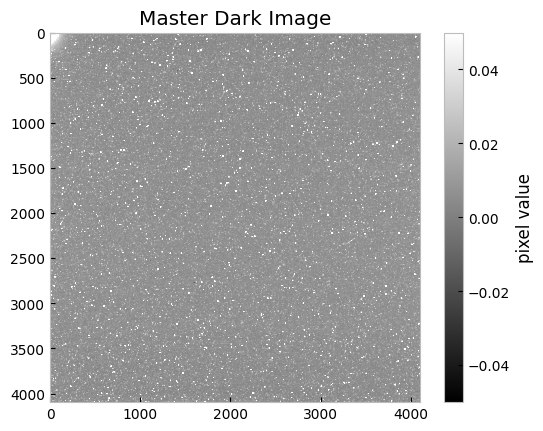

In [17]:
#Imagen master dark 
plt.imshow(master_dark, cmap='gray', vmin=-0.05, vmax=0.05) #vmin y vmax son los límites de la color bar que pintará la imagen master dark (es necesario por las grandes escalas)
plt.colorbar(label = 'pixel value') #nombre de la color bar
plt.title('Master Dark Image')#título de la imagen
plt.grid(False) #le saco el cuadriculado (viene por defecto en el estilo de plot que estoy utilizando)
plt.show() #para mostrar la imagen

In [18]:
#Parte del Master Flat!!

In [19]:
directorio = np.asarray(os.listdir()) #creamos un array con los nombres del directorio

Queremos ver el Master Flat ahora, pero para eso tenemos que tener en consideración que debemos combinar los flats que estén en el mismo filtro que la imagen "Light", ya que esta corresponde a la imagen del objeto astronómico que estemos observando. Esto es necesario ya que cada filtro tiene su propia corrección, ya que cada uno tiene propiedades distintas, por lo que el master flat es la imagen que tiene los errores del filtro (no tendría sentido ocupar filtro B para el master flat y luego hacerle la corrección a la imagen del objeto astronómico que está en filtro V)

In [20]:
light_name = []
time_exp_light = []
for i in directorio: #ciclo for para recorrer el directorio con las imágenes .fit
    if 'Light' in i: #estamos interesados en las Light para ver sus nombres, filtro y tiempo  de exposición
        light = fits.open(i)
        hdr_light = light[0].header
        print('ImageName: ' + str(i) + ' / TypeImage: ' + str(hdr_light['IMAGETYP']) + ' / Filter: ' + str(hdr_light['FILTER']))
        if hdr_light['FILTER'] == 'V': #Aquí ya establecemos que tendré que ocupar las imágenes flat del filtro V, ya que quiero aplicar los cambios sobre la imagen light de filtro V
            light_name.append(i)
            time_exp_light.append(hdr_light['EXPTIME'])
print(light_name)
print(time_exp_light)

ImageName: CA__f_i_t_eLight00000177.fit / TypeImage: Light Frame / Filter: B
ImageName: CA__f_i_t_eLight00000176.fit / TypeImage: Light Frame / Filter: V
ImageName: CA__f_i_t_eLight00000175.fit / TypeImage: Light Frame / Filter: B
ImageName: CA__f_i_t_eLight00000174.fit / TypeImage: Light Frame / Filter: B
ImageName: CA__f_i_t_eLight00000178.fit / TypeImage: Light Frame / Filter: sloan_r
['CA__f_i_t_eLight00000176.fit']
[240.0]


In [21]:
flat_names = []
time_exp_flat = []
for i in directorio: #ciclo for para recorrer todos los archivos (estamos interesados en los falts)
    if 'Flat' in i:
        flat = fits.open(i)
        hdr_flat = flat[0].header
        print('ImageName: ' + str(i) + ' / TypeImage: ' + str(hdr_flat['IMAGETYP']) + ' / Filter: ' + str(hdr_flat['FILTER']))
        if hdr_flat['FILTER'] == 'V':
            flat_names.append(i)
            time_exp_flat.append(hdr_flat['EXPTIME'])
print(len(flat_names))
print(len(time_exp_flat))

ImageName: _t_q_i_m_fFlat00000115.fit / TypeImage: Flat Field / Filter: V
ImageName: _t_q_i_m_fFlat00000118.fit / TypeImage: Flat Field / Filter: B
ImageName: _t_q_i_m_fFlat00000109.fit / TypeImage: Flat Field / Filter: V
ImageName: CA__f_i_t_eFlat00000158.fit / TypeImage: Flat Field / Filter: sloan_r
ImageName: _t_q_i_m_fFlat00000119.fit / TypeImage: Flat Field / Filter: B
ImageName: _t_q_i_m_fFlat00000106.fit / TypeImage: Flat Field / Filter: V
ImageName: CA__f_i_t_eFlat00000153.fit / TypeImage: Flat Field / Filter: sloan_r
ImageName: _t_q_i_m_fFlat00000124.fit / TypeImage: Flat Field / Filter: B
ImageName: _t_q_i_m_fFlat00000108.fit / TypeImage: Flat Field / Filter: V
ImageName: _t_q_i_m_fFlat00000123.fit / TypeImage: Flat Field / Filter: B
ImageName: _t_q_i_m_fFlat00000105.fit / TypeImage: Flat Field / Filter: V
ImageName: _t_q_i_m_fFlat00000112.fit / TypeImage: Flat Field / Filter: V
ImageName: _t_q_i_m_fFlat00000117.fit / TypeImage: Flat Field / Filter: B
ImageName: _t_q_i_m_fFla

Ahora tenemos la imagen del objeto astronómico que vamos a utilizar y un arreglo con los nombres de los flats que utilizaremos para combinar, según el filtro de la imagen Light (filtro V)

In [22]:
flat = np.array([fits.getdata(str(i)) for i in flat_names]) #para tener los datos de todas las imágenes que tenemos en forma de matriz 3D
print(np.shape(flat)) #para observar el tamaño del arreglo que tenemos

(13, 4096, 4096)


In [23]:
norm_flat = []
for i in range(0, len(flat_names)):
    resta_flat = flat[i,:,:] - master_bias - master_dark*time_exp_flat[i]
    norm_flat.append(resta_flat)
print(np.shape(norm_flat))

master_flat_3d = np.asarray(norm_flat) #creo un arreglo como una matriz 3d, en donde son 3 imágenes (2D), con pixeles en ejes x y eje y. 
master_flat = np.mean(master_flat_3d, axis = 0) #combino las imagenes con el promedio por píxel (por eso axis = 0)
#fits.writeto('master_flat_sin_norm.fits', master_flat) #guardo la imagen en formato .fits

(13, 4096, 4096)


In [24]:
flat_1d = master_flat.flatten() #Colocamos los valores de pixeles en un solo array (1 D) 
#err_flat = np.where(dark_1d < 1)[0] #array con las posiciones en donde el valor de dark_1d es menor a 1 (me di cuenta qque si es mayor a 1,debe ser un error instrumental)
#dark_1d_sin_err = dark_1d[err] #aplicamos las posiciones al dark_1d para utilizar un array corregido en el rango de interés
mean_flat = np.mean(flat_1d) #promedio de los valores por pixeles (sería como el color de fondo de la imagen que reproduciré más adelante)
s_desv_flat = np.std(flat_1d) #desviación estandar de los datos que estamos considerando
err_flat_menor = mean_flat - s_desv_flat
err_flat_mayor = mean_flat + s_desv_flat

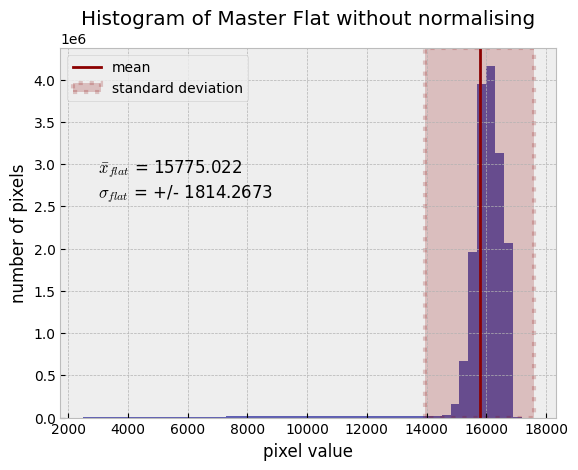

In [25]:
plt.hist(flat_1d, range = (2500, 17500), bins = 50, color = 'darkblue', alpha = 0.6)
plt.axvline(mean_flat, color = 'darkred', label = 'mean') #para mostrar linea roja con el promedio de los datos
plt.axvspan(err_flat_menor, err_flat_mayor, color = 'darkred', alpha=0.2, lw=3, ls = ':', label = 'standard deviation') #región en donde tenemos la desviación estandar en los extremos (c/r al mean)
plt.title('Histogram of Master Flat without normalising') #titulo de la imagen
plt.text(3000, 2.9*1e6, r'$\bar{x}_{flat}$ = ' + str(round(mean_flat, 4)), fontsize=12) #texto con el valor del promedio
plt.text(3000, 2.6*10**6, r'$\sigma_{flat}$ = +/- ' + str(round(s_desv_flat, 4)), fontsize=12) #texto ocn el valor de la desviación estandar
plt.xlabel('pixel value')
plt.ylabel('number of pixels')
plt.legend()
plt.show()

Como se puede observar tenemos valores de pixeles muy altos y otros demasiado pequeños, distribuídos en una cola muy larga de valores pequeños. Apriori podría decirse que corresponden a las esquinas de la imagen que se muestra abajo, sin embago, no es posible asegurarlo, ya que hay regiones que también son muy oscuras y no nocesesariamente en las orillas. (razón para querer normalizarlo)

Cabe mencionar que como en el master dark, ahora no podemos eliminar valores que estén muy bajos o muy altos, ya que no solamente hay 1 o 2 valores que estén muy lejos, sino que es una distribución que indica las regiones más oscuras.

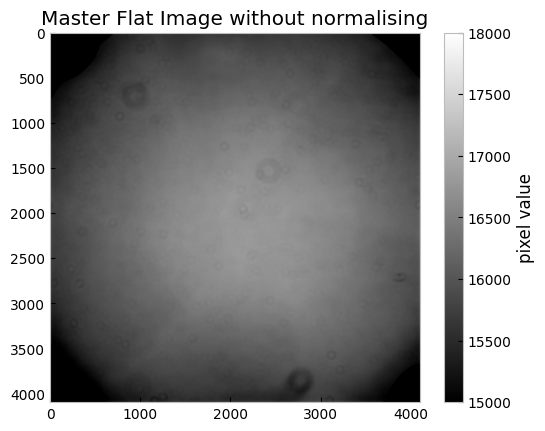

In [26]:
#Imagen master flat sin normalizar
plt.imshow(master_flat, cmap='gray', vmin=15000, vmax=18000) #vmin y vmax son los límites de la color bar que pintará la imagen master flat (es necesario por las grandes escalas)
plt.colorbar(label = 'pixel value') #nombre de la color bar
plt.title('Master Flat Image without normalising')#título de la imagen
plt.grid(False) #le saco el cuadriculado (viene por defecto en el estilo de plot que estoy utilizando)
plt.show() #para mostrar la imagen

En esta parte podemos ver que hay regiones más oscuras que otras y que además hay una especie de "anillos" que vienen dados por el polvo del filtro que se está utilizando (en este caso el filtro V), por lo que queremos la información correcta para poder saber cuánto está siendo afectado por el filtro. Por esta razón tenemos que normalizar este master flat por algún valor representativo de los datos (así obtendríamos un valor con mejor información para normalizar la imagen final). En este caso decidí normalizar el master flat por la mediana de los valores de los pixeles del master flat, esto porque si tomamos el promedio (o el máximo/mínimo valor) podríamos tener más valores de pixeles que se escapen, cuando la idea es que el master flat normalizado esté entre 0 y 1 (se observa en la imagen de arriba que hay regiones muy oscuras y otras bien claras cuando queremos un fondo más homogeneo). 

In [27]:
norm_master_flat = master_flat/np.median(master_flat) #normalizar master flat
#fits.writeto('norm_master_flat.fits', norm_master_flat) #guardo la imagen en formato .fits

In [28]:
norm_master_flat_1d = norm_master_flat.flatten()
mean_norm_flat = np.median(norm_master_flat_1d)
s_desv_norm_flat = np.std(norm_master_flat_1d) #desviación estandar de los datos que estamos considerando
err_flat_norm_menor = mean_norm_flat - s_desv_norm_flat
err_flat_norm_mayor = mean_norm_flat + s_desv_norm_flat

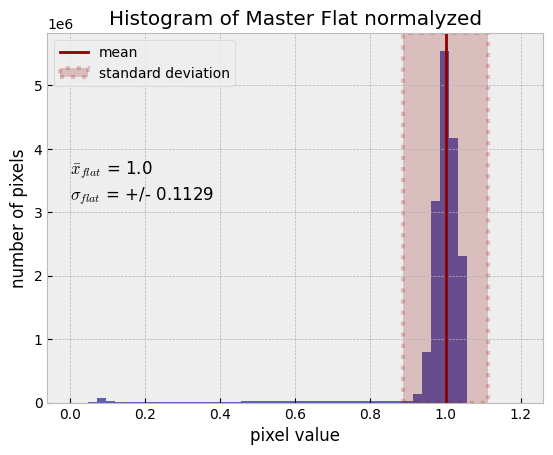

In [29]:
plt.hist(norm_master_flat_1d, bins = 50, range = (0, 1.2), color = 'darkblue', alpha = 0.6)
plt.axvline(mean_norm_flat, color = 'darkred', label = 'mean') #para mostrar linea roja con el promedio de los datos
plt.axvspan(err_flat_norm_menor, err_flat_norm_mayor, color = 'darkred', alpha=0.2, lw=3, ls = ':', label = 'standard deviation') #región en donde tenemos la desviación estandar en los extremos (c/r al mean)
plt.title('Histogram of Master Flat normalyzed') #titulo de la imagen
plt.text(0, 3.6*1e6, r'$\bar{x}_{flat}$ = ' + str(round(mean_norm_flat, 4)), fontsize=12) #texto con el valor del promedio
plt.text(0, 3.2*10**6, r'$\sigma_{flat}$ = +/- ' + str(round(s_desv_norm_flat, 4)), fontsize=12) #texto ocn el valor de la desviación estandar
plt.xlabel('pixel value')
plt.ylabel('number of pixels')
plt.legend()
plt.show()

Ahora en efecto tenemos nuestra distribución entre 0 y 1, lo que permite asegurar que los valores bajo 0.8 no tienen otra alternativa más que ser las esquinas de la imagen, ya que se tiene una distribución de valores de pixeles más homogenea hacia el centro de la imagen (como se ve abajo).

Lo mismo que para el master flat no normalizado, no podemos eliminar valores que estén muy bajos o muy altos, ya que no es solamente hay 1 o 2 valores que estén muy lejos, sino que es una distribución que indica las regiones más oscuras.

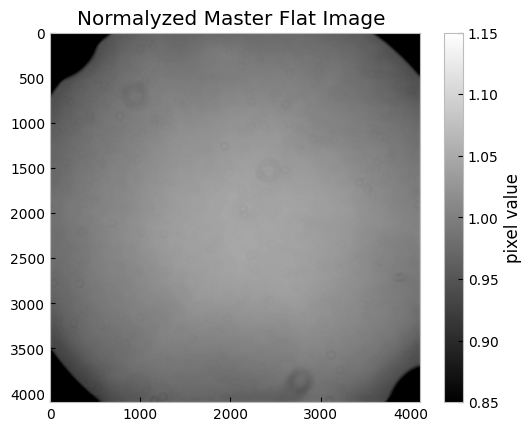

In [45]:
#Imagen master flat
plt.imshow(norm_master_flat, cmap='gray', vmin=0.85, vmax=1.15) #vmin y vmax son los límites de la color bar que pintará la imagen master flat normalizado (es necesario por las grandes escalas)
plt.colorbar(label = 'pixel value') #nombre de la color bar
plt.title('Normalyzed Master Flat Image ')#título de la imagen
plt.grid(False) #le saco el cuadriculado (viene por defecto en el estilo de plot que estoy utilizando)
plt.show() #para mostrar la imagen

In [31]:
#Parte Final!!

In [32]:
image_light_fits = fits.open(light_name[0])
image_light = image_light_fits[0].data
time_light = time_exp_light[0]

In [33]:
light_1d = image_light.flatten()
err_light = np.where((light_1d > 980) & (light_1d < 1060))[0]
light_1d_corr = light_1d[err_light]
light_mean = np.mean(light_1d_corr)
light_ds = np.std(light_1d_corr)
err_light_menor = light_mean + light_ds
err_light_mayor = light_mean - light_ds

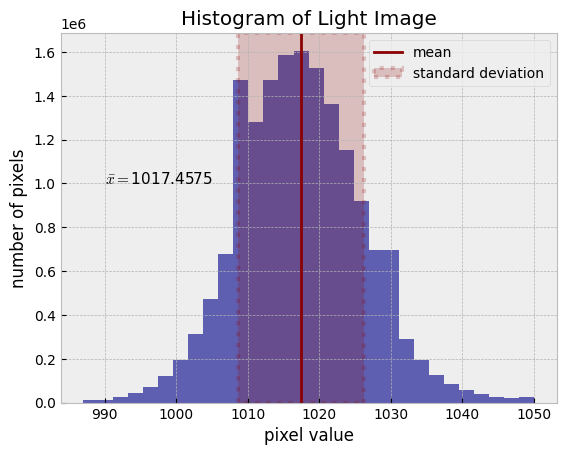

In [34]:
plt.hist(light_1d, bins = 30, range = (987, 1050), color = 'darkblue', alpha = 0.6)
plt.axvline(light_mean, color = 'darkred', label = 'mean') #para mostrar linea roja con el promedio de los datos
plt.axvspan(err_light_menor, err_light_mayor, color = 'darkred', alpha=0.2, lw=3, ls = ':', label = 'standard deviation') #región en donde tenemos la desviación estandar en los extremos (c/r al mean)
plt.title('Histogram of Light Image') #titulo de la imagen
plt.xlabel('pixel value')
plt.ylabel('number of pixels')
plt.text(990, 1*10**6, r'$\bar{x} = $' + str(round(light_mean, 4)), fontsize = 11)
plt.legend()
plt.show()

Este histograma se utilizó con la finalidad de ver el valor de los pixeles, para realizar la imagen

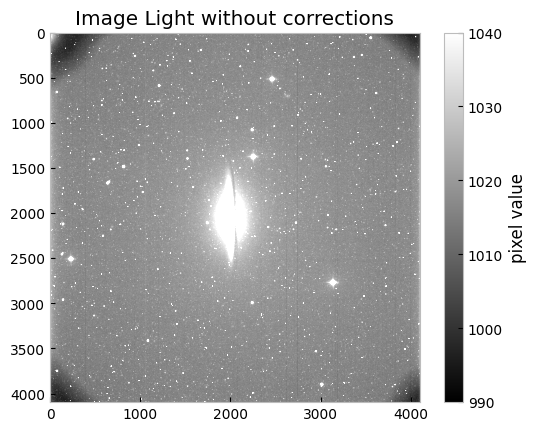

In [35]:
#Imagen without corrections 
plt.imshow(image_light, cmap='gray', vmin = 990, vmax = 1040) #vmin y vmax son los límites de la color bar que pintará la imagen light (es necesario por las grandes escalas)
plt.colorbar(label = 'pixel value') #nombre de la color bar
plt.title('Image Light without corrections')#título de la imagen
plt.grid(False) #le saco el cuadriculado (viene por defecto en el estilo de plot que estoy utilizando)
plt.show() #para mostrar la imagen

In [36]:
#Cálculo de la imagen final!!
final_image = (image_light - master_bias - master_dark*time_light)/norm_master_flat

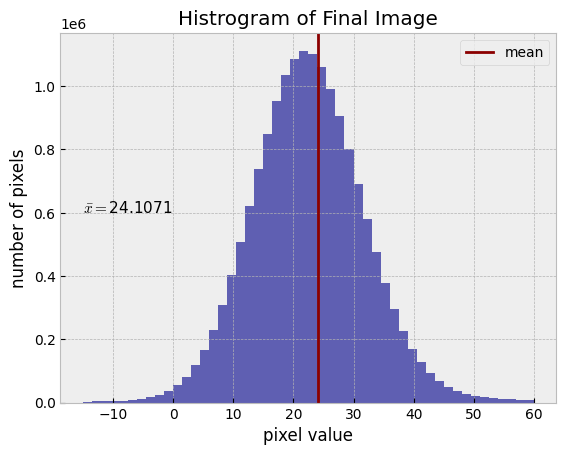

In [37]:
final_image_1d = final_image.flatten()
plt.hist(final_image_1d, bins = 50, range = (-15, 60), color = 'darkblue', alpha = 0.6)
plt.axvline(np.mean(final_image_1d), color = 'darkred', label = 'mean')
plt.title('Histrogram of Final Image')
plt.xlabel('pixel value')
plt.ylabel('number of pixels')
plt.text(-15, 0.6*10**6, r'$\bar{x} = $' + str(round(np.mean(final_image_1d), 4)), fontsize = 11)
plt.legend()
plt.show()

Este histograma se utilizó con la finalidad de ver el valor de los pixeles, para realizar la imagen final

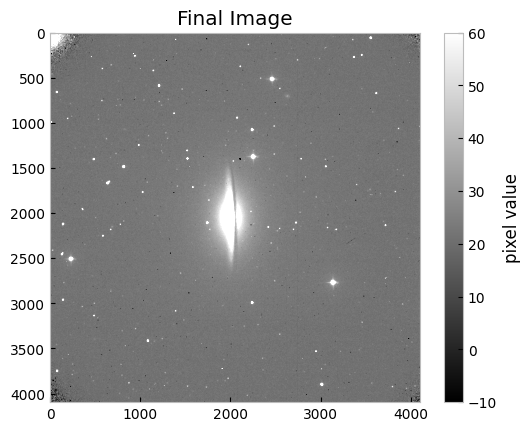

In [44]:
#Final Imagen (No se habla de ella aquí, sino que más abajo!)
plt.imshow(final_image, cmap='gray', vmin = -10, vmax = 60) #vmin y vmax son los límites de la color bar que pintará la imagen (es necesario por las grandes escalas)
plt.colorbar(label = 'pixel value') #nombre de la color bar
plt.title('Final Image')#título de la imagen
plt.grid(False) #le saco el cuadriculado (viene por defecto en el estilo de plot que estoy utilizando)
plt.show() #para mostrar la imagen

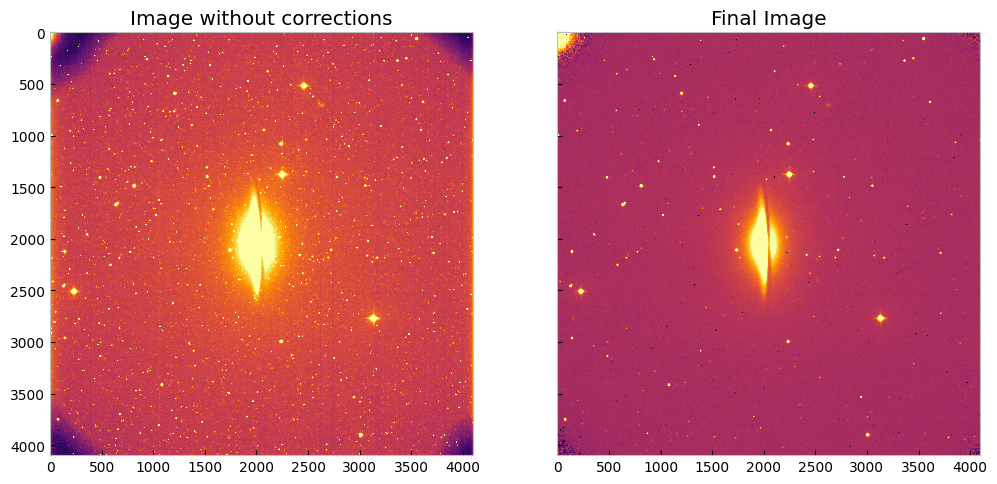

In [39]:
#para graficar ambas imágenes juntas!!
fig, ax = plt.subplots(1, 2, sharey = True, figsize = [12, 12])
ax[0].imshow(image_light, cmap='inferno', vmin = 990, vmax = 1040)
ax[0].grid(False)
ax[0].set_title('Image without corrections')

ax[1].imshow(final_image, cmap='inferno', vmin = -10, vmax = 60)
ax[1].grid(False)
ax[1].set_title('Final Image')

#plt.savefig('final_image.jpg', dpi = 600)
plt.show()

Es importante notar que la imagen corregida posee unos puntos negros que no aparecen en la imagen light, apriori podría decirse que es debido a las correcciones que se hicieron, además podemos decir que es más probable que este error se encuentre en el master dark, ya que el bias son principalmente linea, el master flat son principalmente anillos de polvo o regiones que tienen más o menos luz, en cambio el master dark es ruido térmico que provoca esos puntos que podemos ver en la imagen del master dark, por lo que deben ser pixeles que tienen mucho ruido y al momento de ser restados en el master dark, provocarían esos agujeros. 

Podría pensarse también que pueden ser rayos cósmicos, que inciden en la captura de luz, de alguna parte que no es posible controlar, sin embargo, es dificil que lo sea, ya que en la imagen light no aparecen esos puntos y deberían estar en ambas si fuese así.

Para corregirlo podrían buscarse los pixeles en la imagen dark y los que tengan un valor mucho más alto que la desviación estandar, podría llevarnos a encontrarlos. Por falta de tiempo no podré hacerlo :(, sin emargo, me parece un análisis interesante.

De todas formas es posible observar que se corriguieron las lineas del bias (analog to digital), el dark noise (errores térmicos), el polvo del filtro y las regiones en las que incide menos y más luz. Esto gracias a realizar la resta entre la imagen del objeto sin corregir, el master_bias y el master dark por el tiempo de exposición de la imagen light, divido por el master flat normalizado!! 

In [40]:
rest_image = image_light - final_image #Imagen que entre la resta de light image y final image
res_1d = rest_image.flatten() #arra6 1D para analizar el valor de pixeles de esta imagen

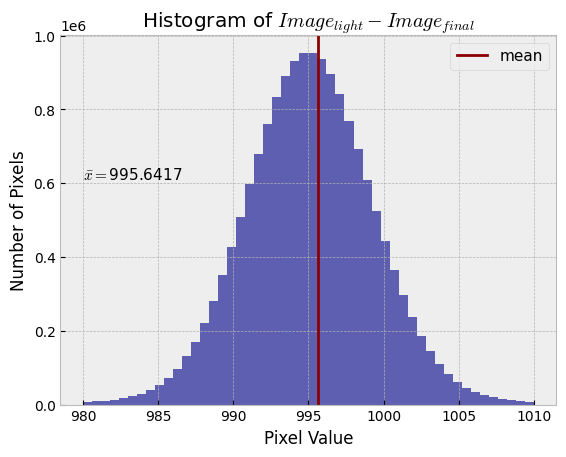

In [41]:
#histograma entre la resta de ambas imágenes
plt.hist(res_1d, bins = 50, range = (980, 1010), color = 'darkblue', alpha = 0.6)
plt.axvline(np.mean(res_1d), color = 'darkred', label = 'mean')
plt.xlabel('Pixel Value')
plt.ylabel('Number of Pixels')
plt.legend(fontsize = 11)
plt.title(r'Histogram of $Image_{light} - Image_{final}$')
plt.text(980, 0.61*10**6, r'$\bar{x} = $' + str(round(np.mean(res_1d), 4)), fontsize = 11)
plt.show()

Podemos ver que el promedio de esta distribución sugiere un valor de pixel promedio cercano a 1000, esto es debido a que a la imagen light le estamos agregando el bias y los otros ruidos que tenemos!!

Esto ocurre porque al restar la imagen light con la corregida, estamos quedándonos con el puro ruido + parte de la imagen light, como se puede observar a continuación no se ven las estrellas presentes en las imágenes, ya que nos quedamos con los puntos correspondientes al master dark, las lineas del master bias, más el polvo y las orillas oscurecidas por el flat!!

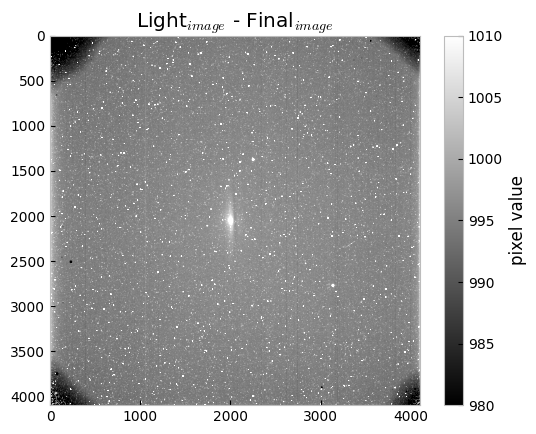

In [43]:
#Imagen entre la resta (imagen de ruido)
plt.imshow(rest_image, cmap='gray', vmin = 980, vmax = 1010) #vmin y vmax son los límites de la color bar que pintará la imagen (es necesario por las grandes escalas)
plt.colorbar(label = 'pixel value') #nombre de la color bar
plt.title(r'Light$_{image}$ - Final$_{image}$')#título de la imagen
plt.grid(False) #le saco el cuadriculado (viene por defecto en el estilo de plot que estoy utilizando)
plt.show() #para mostrar la imagen